# Big Mart Sales III

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Train_UWu5bXk.csv')
df.shape

(8523, 12)

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## EDA of Big Mart Dataset

In [7]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

* As there are 2 names in column "Item_Fat_Content" - low fat and regualar, so we are updating them using replace function

In [8]:
df['Item_Fat_Content'].replace(to_replace = 'Low Fat', value = "low", inplace = True)
df['Item_Fat_Content'].replace(to_replace = 'low fat', value = "low", inplace = True)
df['Item_Fat_Content'].replace(to_replace = 'LF', value = "low", inplace = True)
df['Item_Fat_Content'].replace(to_replace = 'Regular', value = "regular", inplace = True)
df['Item_Fat_Content'].replace(to_replace = 'reg', value = "regular", inplace = True)

In [9]:
print("\ndf['Item_Identifier'].unique() : \n", df['Item_Identifier'].unique())
print("\ndf['Item_Identifier'].nunique() : \n", df['Item_Identifier'].nunique())
print("\ndf['Item_Identifier'].value_counts() : \n", df['Item_Identifier'].value_counts().head())


df['Item_Identifier'].unique() : 
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

df['Item_Identifier'].nunique() : 
 1559

df['Item_Identifier'].value_counts() : 
 FDW13    10
FDG33    10
FDF56     9
FDF52     9
DRE49     9
Name: Item_Identifier, dtype: int64


In [10]:
print("\ndf['Item_Type'].unique() : \n", df['Item_Type'].unique())
print("\ndf['Item_Type'].nunique() : \n", df['Item_Type'].nunique())
print("\ndf['Item_Type'].value_counts() : \n", df['Item_Type'].value_counts())


df['Item_Type'].unique() : 
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

df['Item_Type'].nunique() : 
 16

df['Item_Type'].value_counts() : 
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


* Maximum bougth products lies in Fruits and Vegetables category, and minimum lies in Seafood

In [11]:
print("\ndf['Outlet_Establishment_Year'].unique() : \n", df['Outlet_Establishment_Year'].unique())
print("\ndf['Outlet_Establishment_Year'].nunique() : \n", df['Outlet_Establishment_Year'].nunique())
print("\ndf['Outlet_Establishment_Year'].value_counts() : \n", df['Outlet_Establishment_Year'].value_counts(ascending = True))


df['Outlet_Establishment_Year'].unique() : 
 [1999 2009 1998 1987 1985 2002 2007 1997 2004]

df['Outlet_Establishment_Year'].nunique() : 
 9

df['Outlet_Establishment_Year'].value_counts() : 
 1998     555
2007     926
2009     928
2002     929
2004     930
1997     930
1999     930
1987     932
1985    1463
Name: Outlet_Establishment_Year, dtype: int64


* maximum stores are opened in year "1985", ie., 1463. 

In [12]:
print("\ndf['Outlet_Location_Type'].unique() : \n", df['Outlet_Location_Type'].unique())
print("\ndf['Outlet_Location_Type'].nunique() : \n", df['Outlet_Location_Type'].nunique())
print("\ndf['Outlet_Location_Type'].value_counts() : \n", df['Outlet_Location_Type'].value_counts(ascending = True))


df['Outlet_Location_Type'].unique() : 
 ['Tier 1' 'Tier 3' 'Tier 2']

df['Outlet_Location_Type'].nunique() : 
 3

df['Outlet_Location_Type'].value_counts() : 
 Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64


* maximum stores are in Tier 3 cities

In [13]:
print("\ndf['Outlet_Type'].unique() : \n", df['Outlet_Type'].unique())
print("\ndf['Outlet_Type'].nunique() : \n", df['Outlet_Type'].nunique())
print("\ndf['Outlet_Type'].value_counts() : \n", df['Outlet_Type'].value_counts(ascending = True))


df['Outlet_Type'].unique() : 
 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']

df['Outlet_Type'].nunique() : 
 4

df['Outlet_Type'].value_counts() : 
 Supermarket Type2     928
Supermarket Type3     935
Grocery Store        1083
Supermarket Type1    5577
Name: Outlet_Type, dtype: int64


In [14]:
print("\ndf['Outlet_Size'].unique() : \n", df['Outlet_Size'].unique())
print("\ndf['Outlet_Size'].nunique() : \n", df['Outlet_Size'].nunique())
print("\ndf['Outlet_Size'].value_counts() : \n", df['Outlet_Size'].value_counts(ascending = True))


df['Outlet_Size'].unique() : 
 ['Medium' nan 'High' 'Small']

df['Outlet_Size'].nunique() : 
 3

df['Outlet_Size'].value_counts() : 
 High       932
Small     2388
Medium    2793
Name: Outlet_Size, dtype: int64


* maximum stores have outlet_size : 2793

In [15]:
print("\ndf['Outlet_Identifier'].unique() : \n", df['Outlet_Identifier'].unique())
print("\ndf['Outlet_Identifier'].nunique() : \n", df['Outlet_Identifier'].nunique())
print("\ndf['Outlet_Identifier'].value_counts() : \n", df['Outlet_Identifier'].value_counts(ascending = True))


df['Outlet_Identifier'].unique() : 
 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

df['Outlet_Identifier'].nunique() : 
 10

df['Outlet_Identifier'].value_counts() : 
 OUT019    528
OUT010    555
OUT017    926
OUT018    928
OUT045    929
OUT035    930
OUT049    930
OUT046    930
OUT013    932
OUT027    935
Name: Outlet_Identifier, dtype: int64


* there are 1559 items stored in 10 outlets

In [16]:
table = pd.pivot_table(df, index = ['Outlet_Location_Type'], values = ['Item_Type'], aggfunc= len)
table

,Item_Type
Outlet_Location_Type,
Tier 1,2388
Tier 2,2785
Tier 3,3350


In [17]:
df.groupby('Outlet_Location_Type')['Outlet_Type'].value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 1                Supermarket Type1    1860
                      Grocery Store         528
Tier 2                Supermarket Type1    2785
Tier 3                Supermarket Type3     935
                      Supermarket Type1     932
                      Supermarket Type2     928
                      Grocery Store         555
Name: Outlet_Type, dtype: int64

Outlet_Location_Type  Outlet_Type      
Tier 1                Supermarket Type1    1860; 
                      Grocery Store         528

Tier 2                Supermarket Type1    2785; 

Tier 3                Supermarket Type3     935; 
                      Supermarket Type1     932; 
                      Supermarket Type2     928; 
                      Grocery Store         555


In [18]:
df.groupby('Outlet_Type')['Outlet_Location_Type'].value_counts()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 3                   555
                   Tier 1                   528
Supermarket Type1  Tier 2                  2785
                   Tier 1                  1860
                   Tier 3                   932
Supermarket Type2  Tier 3                   928
Supermarket Type3  Tier 3                   935
Name: Outlet_Location_Type, dtype: int64

In [19]:
df.groupby('Outlet_Location_Type')['Outlet_Identifier'].value_counts(ascending = True)

Outlet_Location_Type  Outlet_Identifier
Tier 1                OUT019               528
                      OUT046               930
                      OUT049               930
Tier 2                OUT017               926
                      OUT045               929
                      OUT035               930
Tier 3                OUT010               555
                      OUT018               928
                      OUT013               932
                      OUT027               935
Name: Outlet_Identifier, dtype: int64

* location of outlets as per Tier city

Tier 1 :                OUT019; OUT046; OUT049

Tier 2 :                OUT017; OUT045; OUT035

Tier 3 :                OUT010; OUT018; OUT013; OUT027 

In [20]:
df.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

df.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Grocery Store      Small           

Supermarket Type1  Small; High; Medium

Supermarket Type2  Medium

Supermarket Type3  Medium


In [21]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
Name: Outlet_Size, dtype: int64

* we have found the value of NaN value in column " Outlet_Size" as "Small", because ; on filtering we analyzed,
    Grocery Store are "Small" size and after filling those values, we are left with Tier 2 cities that have only "Small" size stores.
    
    (Pls, cross-check with the excel)

In [22]:
# we have found the value of NaN value in column " Outlet_Size" as "Small"

df['Outlet_Size'].fillna("Small", inplace = True)

# hence we are successful in meeting our first target of filling NaN values

In [23]:
table = pd.pivot_table(df, index = ['Item_Type'], values = ['Item_Weight'], aggfunc= np.mean)
table

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


* We are filling 0 as value in column "Item_Weight" to check what are the names under column "Item_Type". 
We got all the names in our answer. that's why you shall begin again from start,ie, don't implement next 2 code lines

In [24]:
#df["Item_Weight"].fillna(0, inplace = True)

In [25]:
#df[df["Item_Weight"] == 0]['Item_Type'].value_counts()

In [26]:
def impute_weight(cols) : 
    weight = cols[0]
    type = cols[1]
    if pd.isnull(weight) :
        if type == "Baking Goods" :
            return 12.277108
        elif type == "Breads" :
            return 11.346936
        elif type == "Breakfast" :
            return 12.768202
        elif type == "Canned" :
            return 12.305705
        elif type == "Dairy" :
            return 13.426069
        elif type == "Frozen Foods" :
            return 12.867061
        elif type == "Fruits and Vegetables" :
            return 13.224769
        elif type == "Hard Drinks" :
            return 11.400328
        elif type == "Health and Hygiene" :
            return 13.142314
        elif type == "Household" :
            return 13.384736
        elif type == "Meat" :
            return 12.817344
        elif type == "Others" :
            return 13.853285
        elif type == "Seafood" :
            return 12.552843
        elif type == "Snack Foods" :
            return 12.987880
        elif type == "Soft Drinks" :
            return 11.847460
        elif type == "Starchy Foods" :
            return 13.690731
    else :
        return weight

In [27]:
df['Item_Weight'] = df[['Item_Weight', "Item_Type"]].apply(impute_weight, axis = 1)
# we are successful in meeting our second target of filling NaN values

Now, no column have NaN values

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


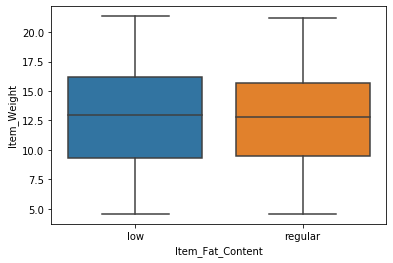

In [29]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Weight', data = df)

C:\Users\Nitish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


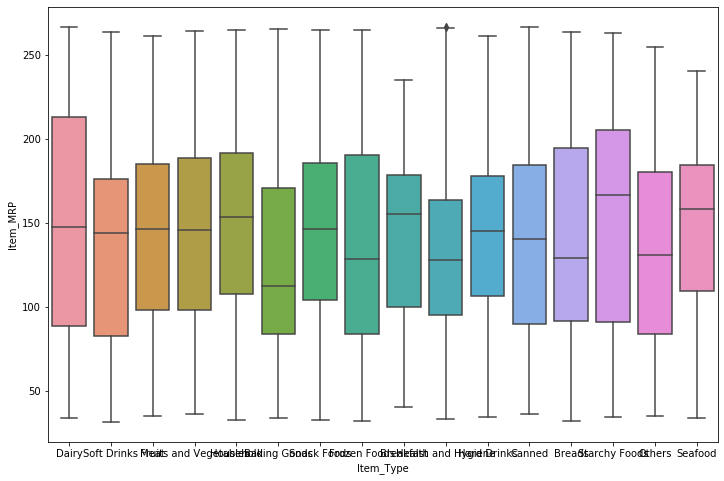

In [30]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Item_Type', y = 'Item_MRP', data = df)
fig.show()

In [31]:
table = pd.pivot_table(df, index = ['Outlet_Identifier'], values = ['Item_Visibility'], aggfunc= np.sum)
table

,Item_Visibility
Outlet_Identifier,
OUT010,56.308832
OUT013,55.879859
OUT017,56.834646
OUT018,56.621454
OUT019,57.257041
OUT027,54.804764
OUT035,56.974873
OUT045,56.180780
OUT046,56.231875


In [32]:
table = pd.pivot_table(df, index = ['Outlet_Identifier'], values = ['Item_Outlet_Sales'], aggfunc= np.sum)
table

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


In [33]:
table = pd.pivot_table(df, index = ['Outlet_Type'], values = ['Item_Outlet_Sales'], aggfunc= np.sum)
table

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,3.680343e+05
Supermarket Type1,1.291734e+07
Supermarket Type2,1.851823e+06
Supermarket Type3,3.453926e+06


In [34]:
table = pd.pivot_table(df, index = ['Outlet_Location_Type'], values = ['Item_Outlet_Sales'], aggfunc= np.sum)
table

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,4.482059e+06
Tier 2,6.472314e+06
Tier 3,7.636753e+06


In [35]:
table = pd.pivot_table(df, index = ['Item_Type'], values = ['Item_Outlet_Sales'], aggfunc= np.sum)
table

,Item_Outlet_Sales
Item_Type,
Baking Goods,1.265525e+06
Breads,5.532372e+05
Breakfast,2.322990e+05
Canned,1.444151e+06
Dairy,1.522594e+06
Frozen Foods,1.825735e+06
Fruits and Vegetables,2.820060e+06
Hard Drinks,4.577934e+05
Health and Hygiene,1.045200e+06


* Tier3 has maximum sales of Rs.(76,36,753.00) and  Tier1 has minimum sales of Rs.(44,82,059.00)
* OUT035 has maximum sales Rs.(22,68,123.00) and OUT019 has minimum sales Rs.(1,79,694.10)
* Supermarket Type1 has maximum sales of Rs.(1,29,17,340.00) and Grocery Store has minimum sales of Rs.( 3,68,034.30)
* Fruits and Vegetables has maximum sales of Rs.(28,20,060.00) and Seafood has minimum sales of Rs.(1,48,868.20)

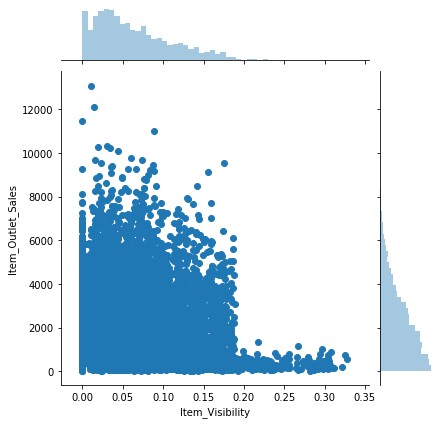

In [36]:
sns.jointplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df)

* the product that has minimum visibility with respect to area has maximum amount of sales and vice-versa

# making of correct dataset for processing

In [260]:
df1 = df.copy()

In [261]:
df1.drop(["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"], axis = 1, inplace = True)

In [262]:
print(df1.shape)
df1.head()

(8523, 9)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,low,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,low,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,regular,0.000000,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800
4,8.93,low,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [263]:
#fat = pd.get_dummies(df1['Item_Fat_Content'])

In [264]:
df1_numerical = df1[["Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]]

* here, we removed column "Item_Weight", as it doesn't play significant role. It's p-value was 0.67, taken from est table drawn below

In [265]:
print(df1_numerical.shape)
df1_numerical.head()

(8523, 3)


,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.016047,249.8092,3735.1380
1,0.019278,48.2692,443.4228
2,0.016760,141.6180,2097.2700
3,0.000000,182.0950,732.3800
4,0.000000,53.8614,994.7052


In [266]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [267]:
scaler = StandardScaler()

In [268]:
df1_num = scaler.fit_transform(df1_numerical)

In [269]:
#df1_num

In [270]:
df1_num_frame = pd.DataFrame(df1_num, columns=df1_numerical.columns)

In [271]:
df1_num_frame.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.970732,1.747454,0.910601
1,-0.908111,-1.489023,-1.018440
2,-0.956917,0.010040,-0.049238
3,-1.281758,0.660050,-0.849103
4,-1.281758,-1.399220,-0.695373


In [272]:
df1_num_frame.to_csv("StandardScaled_Item_Outlet_Sales.csv")

In [273]:
fat = pd.get_dummies(df1['Item_Fat_Content'], drop_first=True)
fat.head()

,regular
0,0
1,1
2,0
3,1
4,0


In [274]:
#itemType = pd.get_dummies(df1['Item_Type'], drop_first=True)
#itemType.head()

In [275]:
size = pd.get_dummies(df1['Outlet_Size'], drop_first=True)
size.head()

,Medium,Small
0,1,0
1,1,0
2,1,0
3,0,1
4,0,0


In [276]:
#location = pd.get_dummies(df1['Outlet_Location_Type'], drop_first=True)
#location.head()

In [277]:
outletType = pd.get_dummies(df1['Outlet_Type'], drop_first=True)
outletType.head()

,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,1,0,0


In [278]:
df1_num_frame = pd.concat([fat, size, outletType, df1_num_frame], axis = 1)

In [279]:
df1_num_frame.head()

,regular,Medium,Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0,1,0,1,0,0,-0.970732,1.747454,0.910601
1,1,1,0,0,1,0,-0.908111,-1.489023,-1.018440
2,0,1,0,1,0,0,-0.956917,0.010040,-0.049238
3,1,0,1,0,0,0,-1.281758,0.660050,-0.849103
4,0,0,0,1,0,0,-1.281758,-1.399220,-0.695373


In [280]:
df1_num_frame.shape

(8523, 9)

# Applying model training and testing

# Finding the appropriate one

In [281]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import time

In [282]:
x = df1_num_frame.drop("Item_Outlet_Sales", axis = 1)
y = df1_num_frame['Item_Outlet_Sales']

In [283]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [284]:
models_list = []
models_list.append(('REGRESSION', LinearRegression()))
models_list.append(('CART', DecisionTreeRegressor()))
models_list.append(('KNN', KNeighborsRegressor()))
models_list.append(('SVM', SVR())) # took 15 sec

In [285]:
import warnings

num_folds = 10
results = []
names = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name, model in models_list:
        kfold = KFold(n_splits=num_folds, random_state=123)
        start = time.time()
        cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold)
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

REGRESSION: 0.558339 (0.018158) (run time: 0.046861)
CART: 0.190000 (0.073891) (run time: 0.265563)
KNN: 0.523552 (0.020637) (run time: 0.125005)
SVM: 0.594117 (0.017590) (run time: 10.263212)


#### Min-Max Scaler (without item_type): 

REGRESSION: 0.556019 (0.017947) (run time: 0.078134)

CART: 0.168837 (0.068288) (run time: 0.421773)

KNN: 0.499872 (0.022673) (run time: 0.484293)

SVM: 0.586770 (0.018163) (run time: 15.667961)

#### Standard Scaler (without item_type): 

REGRESSION: 0.558059 (0.018292) (run time: 0.070506)

CART: 0.178018 (0.057807) (run time: 0.753226)

KNN: 0.520149 (0.035734) (run time: 0.325452)

SVM: 0.593464 (0.016893) (run time: 29.404863)

#### Standard Scaler (without item_type, output_type): 

REGRESSION: 0.558059 (0.018292) (run time: 0.083138)

CART: 0.173608 (0.057730) (run time: 0.980327)

KNN: 0.519127 (0.035670) (run time: 0.559344)

SVM: 0.593604 (0.016992) (run time: 33.324273)

#### Standard Scaler (without item_type, location): 

REGRESSION: 0.558281 (0.018167) (run time: 0.079465)

CART: 0.182670 (0.071258) (run time: 0.718338)

KNN: 0.520000 (0.029563) (run time: 0.373572)

SVM: 0.593015 (0.017284) (run time: 29.680189)

#### Standard Scaler (without item_type, location, Item_Weight): 

REGRESSION: 0.558339 (0.018158) (run time: 0.075847)

CART: 0.192136 (0.079433) (run time: 0.589220)

KNN: 0.523552 (0.020637) (run time: 0.291624)

SVM: 0.594117 (0.017590) (run time: 27.358596)

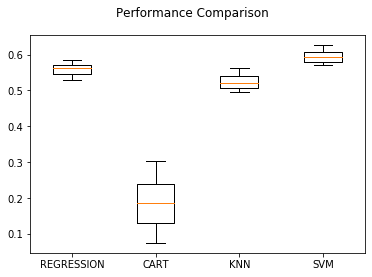

In [286]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [287]:
df1_num_frame.columns

Index(['regular', 'Medium', 'Small', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3', 'Item_Visibility', 'Item_MRP',
       'Item_Outlet_Sales'],
      dtype='object')

In [288]:
import statsmodels.formula.api as smf


In [289]:
est = smf.ols("Item_Outlet_Sales ~ Item_Visibility + Item_MRP", df1_num_frame).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     2180.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:55:09   Log-Likelihood:                -10333.
No. Observations:                8523   AIC:                         2.067e+04
Df Residuals:                    8520   BIC:                         2.069e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.665e-16      0.009   1.89e-14      1.000      -0.017       0.017
Item_Visibility    -0.1279      0.009    -14.513      0.000      -0.145      -0.111
Item_MRP            0.5674      0.009     64.394      0.000       0.550       0.585
==============================================================================
Omnibus:                      815.421   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1718.015
Skew:                           0.614   Prob(JB):                         0.00
Kurtosis:                       4.825   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## regression technique checks (linear, ridge, lasso, elasticnet)

In [290]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [291]:
models_list = []
models_list.append(('LINEAR REGRESSION', LinearRegression()))
models_list.append(('RIDGE', Ridge()))
models_list.append(('LASSO', Lasso()))
models_list.append(('ELASTICNET', ElasticNet())) # took 15 sec

In [292]:
import warnings

num_folds = 10
results = []
names = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name, model in models_list:
        kfold = KFold(n_splits=num_folds, random_state=123)
        start = time.time()
        cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold)
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

LINEAR REGRESSION: 0.558339 (0.018158) (run time: 0.046855)
RIDGE: 0.558336 (0.018072) (run time: 0.015622)
LASSO: -0.002552 (0.001903) (run time: 0.031242)
ELASTICNET: 0.050962 (0.005161) (run time: 0.031242)


#### Regrression methods comparison : 
LINEAR REGRESSION: 0.558339 (0.018158) (run time: 0.046855)

RIDGE: 0.558336 (0.018072) (run time: 0.015622)

LASSO: -0.002552 (0.001903) (run time: 0.031242)

ELASTICNET: 0.050962 (0.005161) (run time: 0.031242)

In [293]:
model = LinearRegression()
model.fit(xtrain, ytrain)
predict = model.predict(xtest)

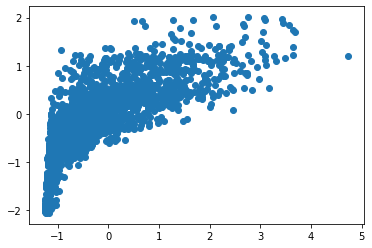

In [294]:
plt.scatter(ytest, predict)
plt.show()

In [295]:
print("\n metrics.mean_absolute_error : \n", metrics.mean_absolute_error(ytest, predict))
print("\n metrics.mean_squared_error : \n", metrics.mean_squared_error(ytest, predict))
print("\n metrics.r2_score : \n", metrics.r2_score(ytest, predict))
print("\n np.sqrt(metrics.mean_squared_error(ytest, predict)) : \n", np.sqrt(metrics.mean_squared_error(ytest, predict)))


 metrics.mean_absolute_error : 
 0.4876623310640118

 metrics.mean_squared_error : 
 0.4253943487765931

 metrics.r2_score : 
 0.5673292478040936

 np.sqrt(metrics.mean_squared_error(ytest, predict)) : 
 0.6522226220981553


#### Ridge : 

 metrics.mean_absolute_error : 
 0.48751560584993503

 metrics.mean_squared_error : 
 0.42529463025018593

 metrics.r2_score : 
 0.5674306720236502

 np.sqrt(metrics.mean_squared_error(ytest, predict)) : 
 0.6521461724569009

#### Lasso : 

  metrics.mean_absolute_error : 
 0.7950668036535357

 metrics.mean_squared_error : 
 0.9840253903310388

 metrics.r2_score : 
 -0.0008572211616271197

 np.sqrt(metrics.mean_squared_error(ytest, predict)) : 
 0.9919805392904837

#### ElasticNet : 

metrics.mean_absolute_error : 
 0.7716764478990509

 metrics.mean_squared_error : 
 0.9332608879553357

 metrics.r2_score : 
 0.050775611975235724

 np.sqrt(metrics.mean_squared_error(ytest, predict)) : 
 0.966054288306478

#### out of Regression techniques, Ridge is the most suitable one

linear : 0.56732; 
ridge : 0.5674; 
lasso : -0.000857; 
elasticnet : 0.05077

## Tuning of SVR

In [296]:
from sklearn.model_selection import GridSearchCV


In [297]:
# this step will take 9.5 minutes so let it process
"""
def svr_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'kernel':['linear','poly', "rgb"],'C': [10, 1, 0.1, 0.01], "epsilon" : [0.1, 0.5]}
    # SVR tree model
    svr_model=SVR()
    #use gridsearch to test all values
    svr_gscv = GridSearchCV(svr_model, param_grid, cv=nfolds)
    #fit model to data
    svr_gscv.fit(X, y)
    print("\ngrid.best_params_ : \n", grid.best_params_)
    print("\ngrid.best_estimator_ : \n", grid.best_estimator_)
    print("\ngrid.best_index_ : \n", grid.best_index_)
    print("\ngrid.best_score_ : \n", grid.best_score_)
    return svr_gscv.best_params_
"""

'\ndef svr_grid_search(X,y,nfolds):\n    #create a dictionary of all values we want to test\n    param_grid = { \'kernel\':[\'linear\',\'poly\', "rgb"],\'C\': [10, 1, 0.1, 0.01], "epsilon" : [0.1, 0.5]}\n    # SVR tree model\n    svr_model=SVR()\n    #use gridsearch to test all values\n    svr_gscv = GridSearchCV(svr_model, param_grid, cv=nfolds)\n    #fit model to data\n    svr_gscv.fit(X, y)\n    print("\ngrid.best_params_ : \n", grid.best_params_)\n    print("\ngrid.best_estimator_ : \n", grid.best_estimator_)\n    print("\ngrid.best_index_ : \n", grid.best_index_)\n    print("\ngrid.best_score_ : \n", grid.best_score_)\n    return svr_gscv.best_params_\n'

In [298]:
"""
res = svr_grid_search(xtrain, ytrain, 10)
res
"""

'\nres = svr_grid_search(xtrain, ytrain, 10)\nres\n'

#### SVR with tuning :-  

C = 1, epsilon = 0.1, kernel = "rbf"

metrics.r2_score :   0.6082871249884878


### Training with SVR

In [299]:
df1_num_frame.head()

,regular,Medium,Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0,1,0,1,0,0,-0.970732,1.747454,0.910601
1,1,1,0,0,1,0,-0.908111,-1.489023,-1.018440
2,0,1,0,1,0,0,-0.956917,0.010040,-0.049238
3,1,0,1,0,0,0,-1.281758,0.660050,-0.849103
4,0,0,0,1,0,0,-1.281758,-1.399220,-0.695373


In [300]:
df1_num_frame.shape

(8523, 9)

In [301]:
x = df1_num_frame.drop("Item_Outlet_Sales", axis = 1)
y = df1_num_frame['Item_Outlet_Sales']

In [302]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [303]:
model = SVR(kernel="rbf", C = 1, epsilon = 0.1)

In [304]:
model.fit(xtrain, ytrain)

C:\Users\Nitish\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [305]:
predict = model.predict(xtest)

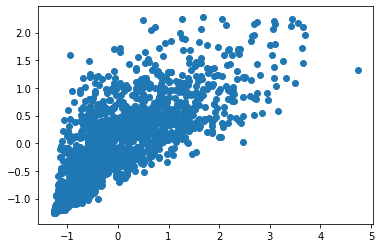

In [306]:
plt.scatter(ytest, predict)

## testing

In [331]:
df_test = pd.read_csv("Test_u94Q5KV.csv")

In [332]:
df_test['Item_Fat_Content'].replace(to_replace = 'Low Fat', value = "low", inplace = True)
df_test['Item_Fat_Content'].replace(to_replace = 'low fat', value = "low", inplace = True)
df_test['Item_Fat_Content'].replace(to_replace = 'LF', value = "low", inplace = True)
df_test['Item_Fat_Content'].replace(to_replace = 'Regular', value = "regular", inplace = True)
df_test['Item_Fat_Content'].replace(to_replace = 'reg', value = "regular", inplace = True)

In [333]:
df_test.drop(["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"], axis = 1, inplace = True)

In [334]:
print(df_test.shape)
df_test.head()

(5681, 8)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,low,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1
1,8.300,regular,0.038428,Dairy,87.3198,NaN,Tier 2,Supermarket Type1
2,14.600,low,0.099575,Others,241.7538,NaN,Tier 3,Grocery Store
3,7.315,low,0.015388,Snack Foods,155.0340,NaN,Tier 2,Supermarket Type1
4,NaN,regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3


In [335]:
#fat = pd.get_dummies(df1['Item_Fat_Content'])

In [336]:
df_test_numerical = df_test[["Item_Visibility", "Item_MRP"]]

* here, we removed column "Item_Weight", as it doesn't play significant role. It's p-value was 0.67, taken from est table drawn below

In [337]:
print(df_test_numerical.shape)
df_test_numerical.head()

(5681, 2)


,Item_Visibility,Item_MRP
0,0.007565,107.8622
1,0.038428,87.3198
2,0.099575,241.7538
3,0.015388,155.0340
4,0.118599,234.2300


In [338]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [339]:
scaler = StandardScaler()

In [340]:
df_test_num = scaler.fit_transform(df_test_numerical)

In [341]:
df_test_num_frame = pd.DataFrame(df_test_num, columns=df_test_numerical.columns)

In [342]:
df_test_num_frame.head()

,Item_Visibility,Item_MRP
0,-1.134077,-0.536555
1,-0.531850,-0.868937
2,0.661316,1.629848
3,-0.981416,0.226697
4,1.032540,1.508110


In [343]:
fat = pd.get_dummies(df_test['Item_Fat_Content'], drop_first=True)
fat.head()

,regular
0,0
1,1
2,0
3,0
4,1


In [344]:
#itemType = pd.get_dummies(df_test['Item_Type'], drop_first=True)
#itemType.head()

In [345]:
size = pd.get_dummies(df_test['Outlet_Size'], drop_first=True)
size.head()

,Medium,Small
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0


In [346]:
#location = pd.get_dummies(df_test['Outlet_Location_Type'], drop_first=True)
#location.head()

In [347]:
outletType = pd.get_dummies(df_test['Outlet_Type'], drop_first=True)
outletType.head()

,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,0,1


In [348]:
df_test_num_frame = pd.concat([fat, size, outletType, df_test_num_frame], axis = 1)

In [349]:
df_test_num_frame.head()

,regular,Medium,Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Visibility,Item_MRP
0,0,1,0,1,0,0,-1.134077,-0.536555
1,1,0,0,1,0,0,-0.531850,-0.868937
2,0,0,0,0,0,0,0.661316,1.629848
3,0,0,0,1,0,0,-0.981416,0.226697
4,1,1,0,0,0,1,1.032540,1.508110


In [350]:
df_test_num_frame.shape

(5681, 8)

In [351]:
predict = model.predict(df_test_num_frame)

In [352]:
predict_file = pd.DataFrame(predict, columns=['predictions'])

In [353]:
predict_file.head()

,predictions
0,-0.253455
1,-0.557087
2,-0.281580
3,0.200869
4,2.020806


In [354]:
predict_file.to_csv("test.csv")

# Job Done here !!!

Thank You